In [1]:
import pandas as pd

import causalpy as cp

import matplotlib.pyplot as plt
plt.style.use('seaborn')

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
C:\Users\aleks\AppData\Local\Temp\ipykernel_56044\3831548409.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
# Read in the data
data = pd.read_csv(r'./data/gt_social_media_data.csv')

In [3]:
data.head()

,date,twitter,linkedin,tiktok,instagram
0,2022-05-15,55,9,23,59
1,2022-05-16,54,18,20,59
2,2022-05-17,54,20,23,57
3,2022-05-18,54,20,21,55
4,2022-05-19,49,23,21,52


In [4]:
# Datetime to index 
data.index = pd.to_datetime(data['date'])
data = data.drop('date', axis=1)

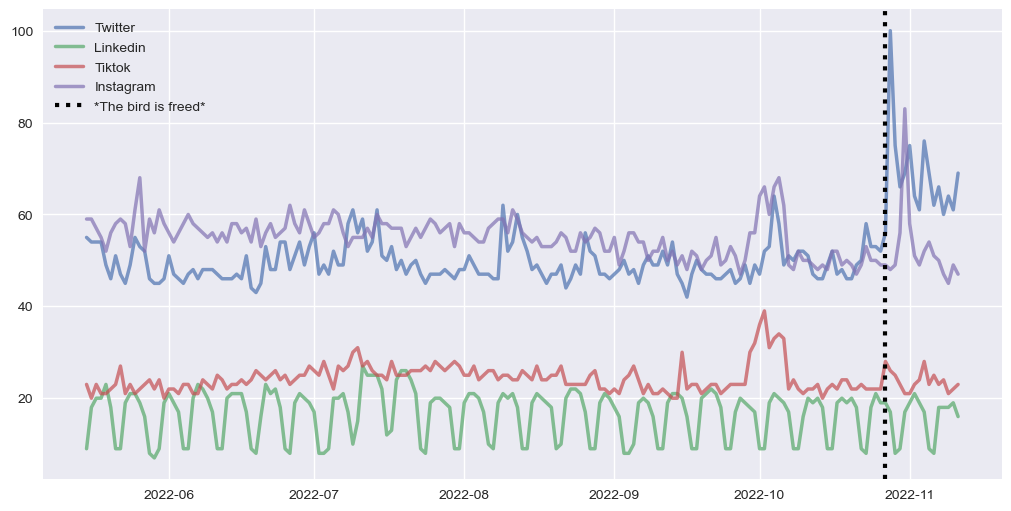

In [6]:
plt.figure(figsize=(10, 5))

for series in data.columns:
    plt.plot(data[series], label=series.title(), lw=2.5, alpha=.7)
    
plt.axvline(pd.to_datetime('2022-10-27'), color='black', lw=3, ls='dotted', label='*The bird is freed*')
plt.legend()
plt.show()

In [7]:
# Get the treatment time index
treatment_index = pd.to_datetime('2022-10-28')

In [8]:
# Build the model
model = cp.pymc_models.WeightedSumFitter()

# Define the model
formula = 'twitter ~ 0 + tiktok + linkedin + instagram'

# Run the experiment
results = cp.pymc_experiments.SyntheticControl(
    data,
    treatment_index,
    formula=formula,
    model=model,
)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 54 seconds.
Sampling: [beta, sigma, y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]


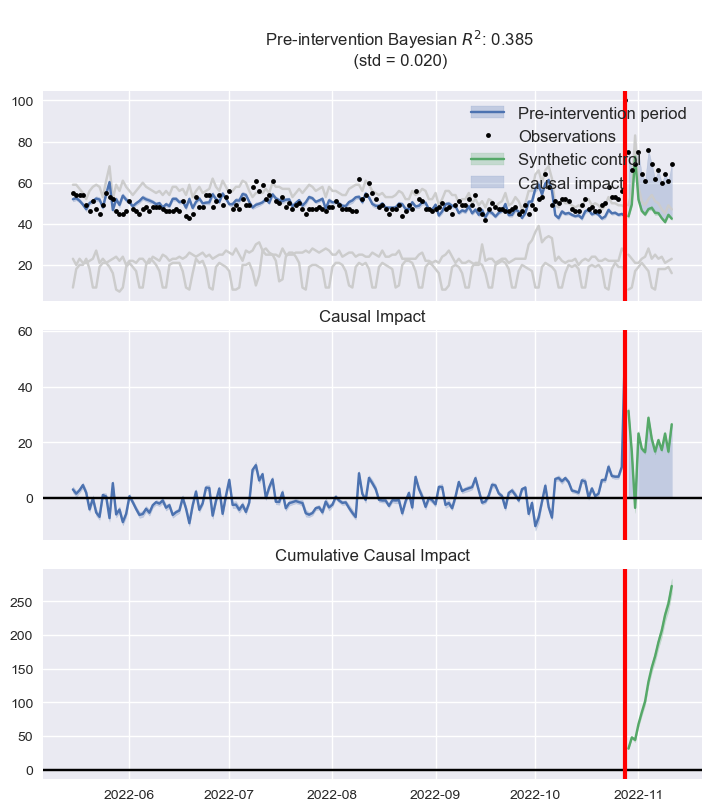

In [9]:
# Plot results
results.plot(plot_predictors=True)
plt.show()

In [10]:
# Print results summary
results.summary()

===============================Synthetic Control================================
Formula: twitter ~ 0 + tiktok + linkedin + instagram
Model coefficients:
tiktok                        0.08, 94% HDI [0.00, 0.17]
linkedin                      0.09, 94% HDI [0.01, 0.15]
instagram                     0.84, 94% HDI [0.81, 0.87]
sigma                         5.78, 94% HDI [5.29, 6.33]
